# Random LUVOIR aperture configurations

And its PSFs

In [1]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
import hcipy as hc

os.chdir('../../pastis/')
import util_pastis as util
from e2e_simulators.luvoir_imaging import LuvoirAPLC

In [2]:
from hcipy import *

In [3]:
# Parameters
nseg = 120    # number of segments
sampling = 4
apodizer_design = 'small'    # 'small', 'medium' or 'large'

In [4]:
# Instantiate LUVOIR object
# This path is specific to the paths used in the LuvoirAPLC class amd within the repository
optics_input = '/Users/pueyo/PythonPackages/PASTIS/LUVOIR_delivery_May2019/'
luvoir = LuvoirAPLC(optics_input, apodizer_design, sampling)

In [5]:
# Create reference PSF
luvoir.flatten()
psf_unaber, ref = luvoir.calc_psf(ref=True)
norm = ref.max()

In [8]:
plt.style.use('bmh')
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Computer Modern Sans"]
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"
plt.rcParams['font.size'] = 22
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 20

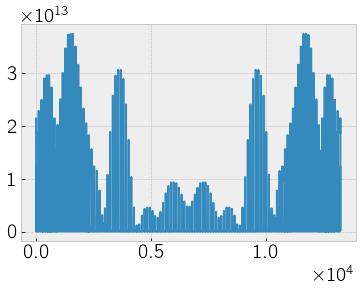

In [10]:
plt.plot(psf_unaber)

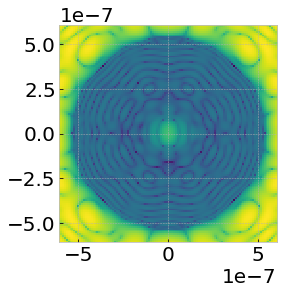

In [9]:
hc.imshow_field(np.log10(psf_unaber/norm))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


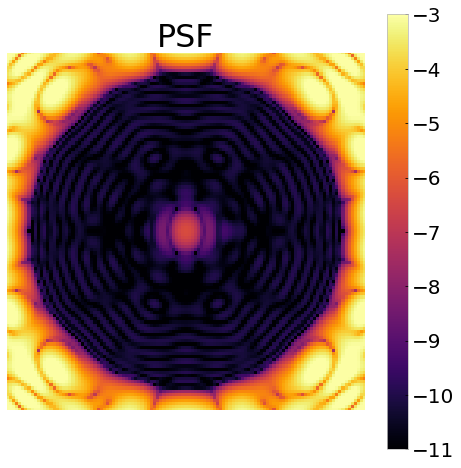

In [10]:
# Plot reference PSF
fig = plt.figure(figsize=(8, 8))
hc.imshow_field(np.log10(psf_unaber/norm), cmap='inferno', vmin = -11, vmax = -3)
plt.axis('off')
plt.title('PSF')
plt.colorbar()

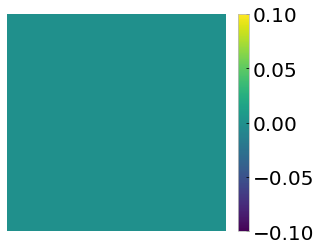

In [11]:
imshow_field(luvoir.sm.surface,grid = None)
plt.axis('off');
plt.colorbar(fraction=0.046, pad=0.04)

I use the -0.5 to have both negative and positive values, since the random numbers are geenrated in range [0,1]. The `*1e-8` puts them approximately on the nanometer level.

In [12]:
# Create as many random numbers between 0 and 1 as we have segments
max_ran_piston = 1000
rand = (np.random.random(nseg) - 0.5) * max_ran_piston*10**(-12)    # [m]

I flatten the `luvoir` object every time before I use it to make sure I have no residual wavefront error on the segments. The segments are numbered from 1-nb_seg, put python starts the loop numbering with `0`, hence the `seg+1` when adressing the segments in `set_segment()`. That function has the signature: `set_segment(segnum, piston, tip, tilt)` and take entries in meters in radians, in **surface error** hence the `/2` when I apply the piston here.

In this particular case, all plots are intensity, except for the very first plot which is the phase on the aperture.

In [13]:
luvoir = LuvoirAPLC(optics_input, apodizer_design, sampling)
luvoir.flatten()
# loop over all segments
for seg, randval in enumerate(rand):
    #print(seg, randval)
    luvoir.set_segment(seg+1, randval/2, 0, 0)
    
# Calculate the E-field in the final plane and intermediate E-fields
psf, inters = luvoir.calc_psf(ref=False, display_intermediate=False, return_intermediate='efield')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


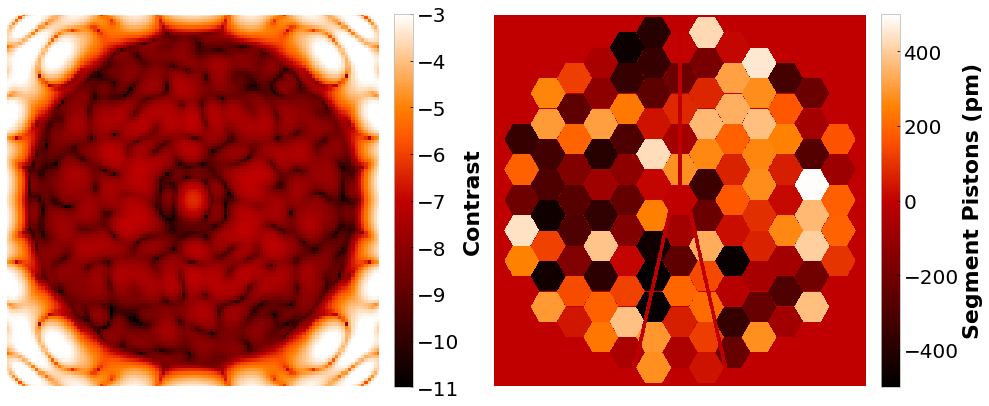

In [14]:
# Display the PSF next to primary wavefront
fig_film = plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
hc.imshow_field(np.log10(psf.intensity/norm), cmap='gist_heat',vmin = -11, vmax = -3)
plt.axis('off')
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.set_label('Contrast')
plt.subplot(1, 2, 2)
hc.imshow_field(inters['seg_mirror'].phase/inters['seg_mirror'].wavenumber/1e-12, cmap='gist_heat',vmin = -max_ran_piston/2, vmax = max_ran_piston/2)
plt.axis('off')
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.set_label('Segment Pistons (pm)')

In [12]:
# for kk in range(0,3):
#     print(kk)
#     rand = (np.random.random(nseg) - 0.5) * max_ran_piston*10**(-12)    # [m]
#     luvoir.flatten()
#     # loop over all segments
#     for seg, randval in enumerate(rand):
#         #print(seg, randval)
#         luvoir.set_segment(seg+1, randval/2, 0, 0)
#     # Calculate the E-field in the final plane and intermediate E-fields
#     psf, inters = luvoir.calc_psf(ref=False, display_intermediate=False, return_intermediate='efield')
#     # Display the PSF next to primary wavefront
#     fig_tmp = plt.figure(figsize=(16, 8))
#     plt.subplot(1, 2, 1)
#     hc.imshow_field(np.log10(psf.intensity/norm), cmap='gist_heat',vmin = -11, vmax = -3)
#     plt.axis('off')
#     cbar = plt.colorbar(fraction=0.046, pad=0.04)
#     cbar.set_label('Contrast')
#     plt.subplot(1, 2, 2)
#     hc.imshow_field(inters['seg_mirror'].phase/inters['seg_mirror'].wavenumber/1e-12, cmap='gist_heat',vmin = -max_ran_piston/2, vmax = max_ran_piston/2)
#     plt.axis('off')
#     cbar = plt.colorbar(fraction=0.046, pad=0.04)
#     cbar.set_label('Segment Pistons (pm)')
#     file_name = 'fig_film_' + str(kk) + '.pdf'
#     fig_tmp.savefig(file_name,transparent=True)

In [26]:
luvoir.aperture.shape

(1000000,)

In [13]:
npoints = np.sqrt(luvoir.aperture.shape)

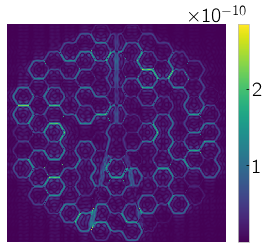

In [14]:
phase_err = luvoir.sm.surface
pupil_grid_luvoir = make_pupil_grid(npoints)
fourier_trans = hc.fourier.make_fourier_transform(pupil_grid_luvoir,q = 1, fov = 0.064)
test = fourier_trans.forward(phase_err)
test2 = fourier_trans.backward(test)
imshow_field(np.abs(phase_err-test2),grid = None)
plt.axis('off');
plt.colorbar(fraction=0.046, pad=0.04)

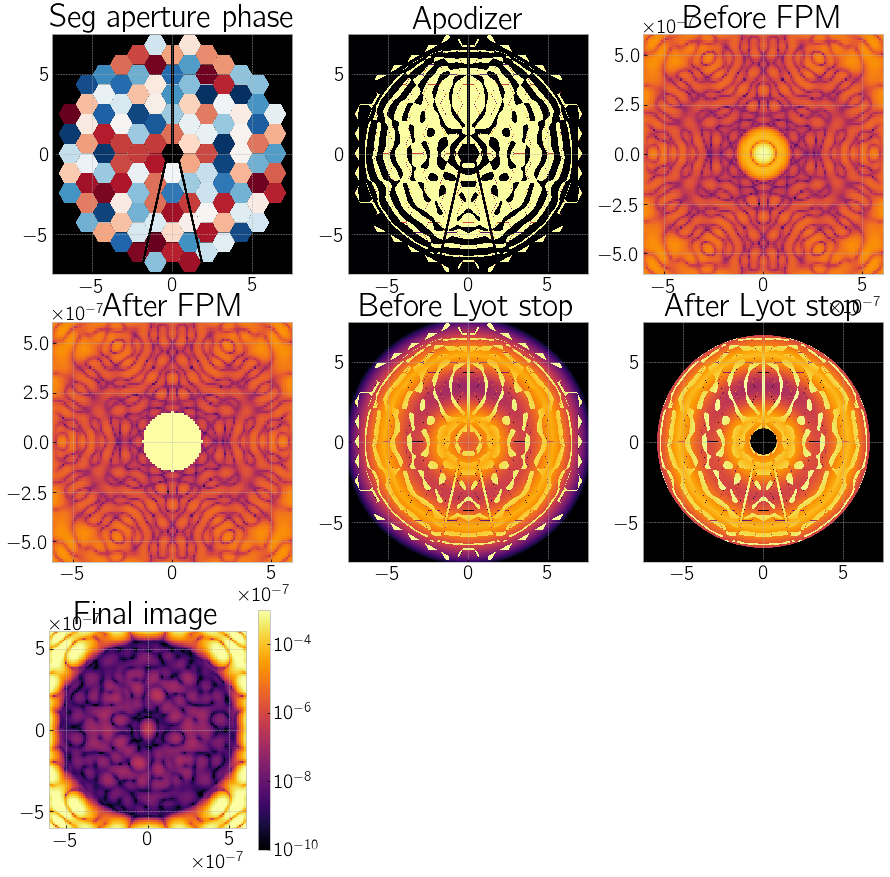

In [15]:
test_wav = luvoir.wf_aper.copy()
test_wav._electric_field = np.exp(-1j*test2*test_wav.wavelength)
luvoir.sm.forward(test_wav)
psf, inters = luvoir.calc_psf(ref=False, display_intermediate=True, return_intermediate='efield')

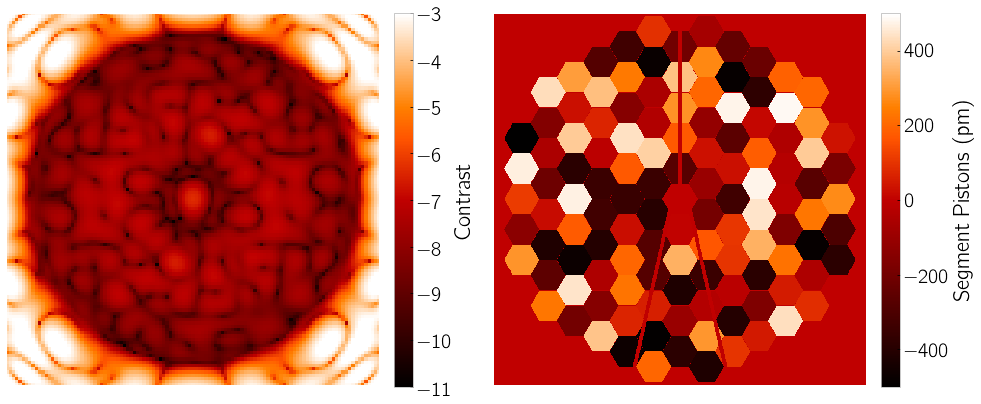

In [16]:
fig_film = plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
hc.imshow_field(np.log10(psf.intensity/norm), cmap='gist_heat',vmin = -11, vmax = -3)
plt.axis('off')
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.set_label('Contrast')
plt.subplot(1, 2, 2)
hc.imshow_field(inters['seg_mirror'].phase/inters['seg_mirror'].wavenumber/1e-12, cmap='gist_heat',vmin = -max_ran_piston/2, vmax = max_ran_piston/2)
plt.axis('off')
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.set_label('Segment Pistons (pm)')

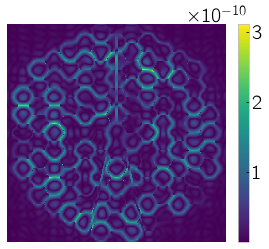

In [23]:
phase_err = luvoir.sm.surface
pupil_grid_luvoir = make_pupil_grid(np.sqrt(luvoir.aperture.shape))
fourier_trans = hc.fourier.make_fourier_transform(pupil_grid_luvoir,q = 1, fov = 0.064/2)
test = fourier_trans.forward(phase_err)
test2 = fourier_trans.backward(test)
imshow_field(np.abs(phase_err-test2),grid = None)
plt.axis('off');
plt.colorbar(fraction=0.046, pad=0.04)

In [17]:
test_wav = luvoir.wf_aper
test_wav._electric_field = -test2
luvoir2.sm.forward(test_wav)
psf, inters = luvoir2.calc_psf(ref=False, display_intermediate=False, return_intermediate='efield')

NameError: name 'luvoir2' is not defined

In [111]:
test_wav._electric_field = -test2

In [112]:
luvoir2.sm.forward(test_wav)

In [114]:
psf, inters = luvoir2.calc_psf(ref=False, display_intermediate=False, return_intermediate='efield')

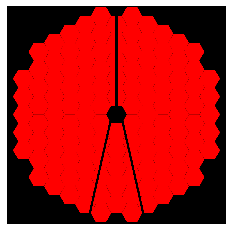

In [95]:
trou = luvoir.wf_aper._electric_field
hc.imshow_field(trou,grid = None)
plt.axis('off');

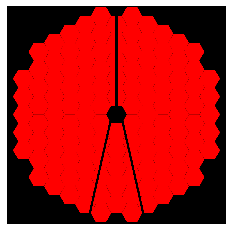

In [94]:
trou = luvoir2.wf_aper._electric_field
hc.imshow_field(trou,grid = None)
plt.axis('off');

### JUNKKK

In [88]:
luvoir2 = LuvoirAPLC(optics_input, apodizer_design, sampling)

In [41]:
sampling

4

In [21]:
np.sqrt(luvoir.aperture.shape)

array([1000.])

In [98]:
phase_err = inters['seg_mirror'].phase

In [24]:
phase_err = inters['seg_mirror'].phase
pupil_grid_luvoir = make_pupil_grid(np.sqrt(luvoir.aperture.shape))
fourier_trans = hc.fourier.make_fourier_transform(pupil_grid_luvoir,q = 1, fov = 0.064/2)
test = fourier_trans.forward(phase_err)
test2 = fourier_trans.backward(test)
imshow_field(phase_err-test2,grid = None)
plt.axis('off');

In [305]:
fourier_trans = hc.fourier.make_fourier_transform(pupil_grid_luvoir,q = 1, fov = 0.064/2)

In [306]:
test = fourier_trans.forward(phase_err)
test2 = fourier_trans.backward(test)

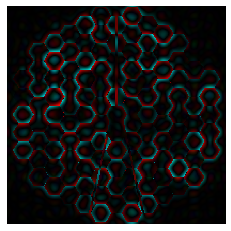

In [307]:
imshow_field(phase_err-test2,grid = None)
plt.axis('off');

In [308]:
luvoir2 = luvoir

In [313]:
luvoir2.wf_aper

In [315]:
luvoir2.wf_aper.__dict__

{'_electric_field': Field([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
 'wavelength': 6.38e-07}

In [79]:
caca = hc.Wavefront(luvoir.apodizer*Exp[phase_err)

Field(-73.76224561)

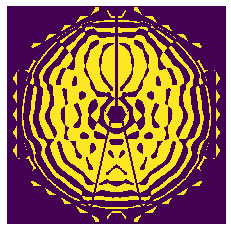

In [80]:
imshow_field(luvoir.apodizer,grid = None)
plt.axis('off');

In [311]:
luvoir2.__dict__

{'nseg': 120,
 'wvln': 6.38e-07,
 'diam': 15.0,
 'sampling': 4,
 'lam_over_d': 4.253333333333333e-08,
 'apod_dict': {'small': {'pxsize': 1000,
   'fpm_rad': 3.5,
   'fpm_px': 150,
   'iwa': 3.4,
   'owa': 12.0,
   'fname': '0_LUVOIR_N1000_FPM350M0150_IWA0340_OWA01200_C10_BW10_Nlam5_LS_IDD0120_OD0982_no_ls_struts.fits'},
  'medium': {'pxsize': 1000,
   'fpm_rad': 6.82,
   'fpm_px': 250,
   'iwa': 6.72,
   'owa': 23.72,
   'fname': '0_LUVOIR_N1000_FPM682M0250_IWA0672_OWA02372_C10_BW10_Nlam5_LS_IDD0120_OD0982_no_ls_struts.fits'},
  'large': {'pxsize': 1000,
   'fpm_rad': 13.38,
   'fpm_px': 400,
   'iwa': 13.28,
   'owa': 46.88,
   'fname': '0_LUVOIR_N1000_FPM1338M0400_IWA1328_OWA04688_C10_BW10_Nlam5_LS_IDD0120_OD0982_no_ls_struts.fits'}},
 'imlamD': 14.399999999999999,
 'aperture': Field([0., 0., 0., ..., 0., 0., 0.]),
 'aper_ind': Field([0., 0., 0., ..., 0., 0., 0.]),
 'apod': Field([0., 0., 0., ..., 0., 0., 0.]),
 'ls': Field([0., 0., 0., ..., 0., 0., 0.]),
 'seg_pos': <hcipy.field.car

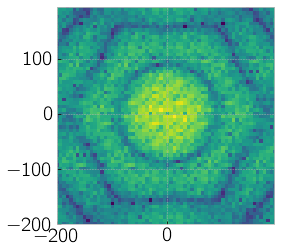

In [294]:
imshow_field(np.log10(np.abs(test)**2),grid = None)

In [282]:
luvoir

In [283]:
aperture

<function hcipy.aperture.realistic.make_magellan_aperture.<locals>.func(grid)>

In [29]:
pupil_grid.shape[0]

256

In [31]:
np.zeros([256,256]).shape

(256, 256)

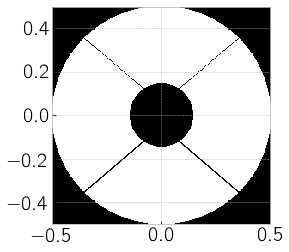

In [27]:
pupil_grid = make_pupil_grid(256)
aperture = make_magellan_aperture(True)
telescope_pupil = aperture(pupil_grid)
imshow_field(telescope_pupil, cmap='gray')
plt.show()

In [202]:
focal_image

In [220]:
fourier_trans = hc.fourier.make_fourier_transform(pupil_grid,q = 1,fov =1)

In [233]:
test = fourier_trans.forward(telescope_pupil)

In [239]:
test.shape

(65536,)

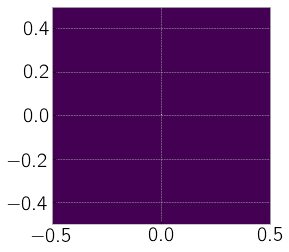

In [241]:
imshow_field(np.abs(test)**2,grid = pupil_grid)

In [242]:
wavefront = inters['seg_mirror'].phase

focal_grid = make_focal_grid(pupil_grid, 8, 16)

prop = FraunhoferPropagator(pupil_grid, focal_grid)

focal_image = prop.forward(wavefront)

imshow_field(np.log10(focal_image.intensity / focal_image.intensity.max()), vmin=-5)
plt.colorbar()
plt.show()


AttributeError: 'Field' object has no attribute 'wavelength'